## **Author**: Shehzad Ahmad
## **Date**: 2024-07-10
## **LinkedIn**: [ds-Shehzad](https://www.linkedin.com/in/ds-shehzad/)
## **Email**: learner.shehzad.com
## **Github**: [learner-shehzad](https://github.com/ShehzadAhmad-learner)

**Data source:** Kaggle [Vertivel-PS](https://www.kaggle.com/datasets/vetrirah/customer)
### About Data
Context
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

Content
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

Acknowledgements
https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

Inspiration
https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement

In [211]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline

In [212]:
# Load the dataset
df = pd.read_csv('./Dataset/Test.csv')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [214]:
df.nunique()

ID                 2627
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

In [215]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [216]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [217]:
df.Ever_Married.unique()

array(['Yes', 'No', nan], dtype=object)

In [218]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,1,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,0,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,1,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,0,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [219]:
df.Ever_Married.fillna(df.Ever_Married.mode()[0], inplace=True)

C:\Users\shahz\AppData\Local\Temp\ipykernel_26152\3950694224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Ever_Married.fillna(df.Ever_Married.mode()[0], inplace=True)


In [220]:
df.Ever_Married.unique()

array(['Yes', 'No'], dtype=object)

In [221]:
df.Ever_Married=df.Ever_Married.map({'Yes':1,'No':0})

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   int64  
 2   Ever_Married     2627 non-null   int64  
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 205.4+ KB


In [223]:
df.Graduated.unique()

array(['Yes', 'No', nan], dtype=object)

In [224]:
df.Graduated=df.Graduated.fillna(df.Graduated.mode()[0])

In [225]:
df.Work_Experience.fillna(df.Work_Experience.mean(),inplace=True)

C:\Users\shahz\AppData\Local\Temp\ipykernel_26152\2196315301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Work_Experience.fillna(df.Work_Experience.mean(),inplace=True)


In [226]:
df.Graduated=df.Graduated.map({'Yes':1,'No':0})

In [227]:
df['Family_Size'].fillna(round(df['Family_Size'].mean()), inplace=True)

C:\Users\shahz\AppData\Local\Temp\ipykernel_26152\3969478653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family_Size'].fillna(round(df['Family_Size'].mean()), inplace=True)


In [228]:
df.Family_Size.unique()

array([1., 4., 2., 5., 3., 6., 8., 7., 9.])

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   int64  
 2   Ever_Married     2627 non-null   int64  
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   int64  
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 205.4+ KB


In [155]:
df.describe()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,0.542063,0.597640,43.649791,0.618957,2.552587,2.825378
std,2618.245698,0.498322,0.490467,16.967015,0.485736,3.341094,1.551906
min,458989.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000
25%,461162.500000,0.000000,0.000000,30.000000,0.000000,0.000000,2.000000
50%,463379.000000,1.000000,1.000000,41.000000,1.000000,1.000000,2.000000
75%,465696.000000,1.000000,1.000000,53.000000,1.000000,4.000000,4.000000
max,467968.000000,1.000000,1.000000,89.000000,1.000000,14.000000,9.000000


<Axes: xlabel='Gender', ylabel='count'>

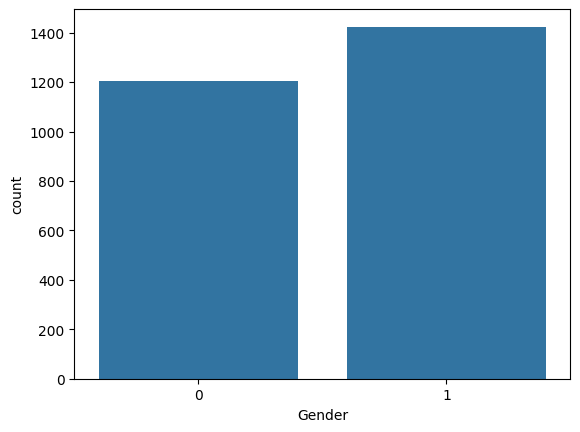

In [156]:
sns.countplot(x='Gender',data=df) 

<Axes: xlabel='Age', ylabel='Count'>

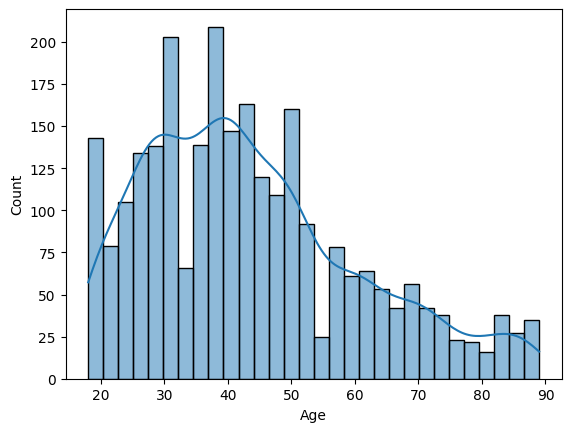

In [157]:
sns.histplot(df['Age'], kde=True, bins=30)

<Axes: xlabel='Spending_Score', ylabel='count'>

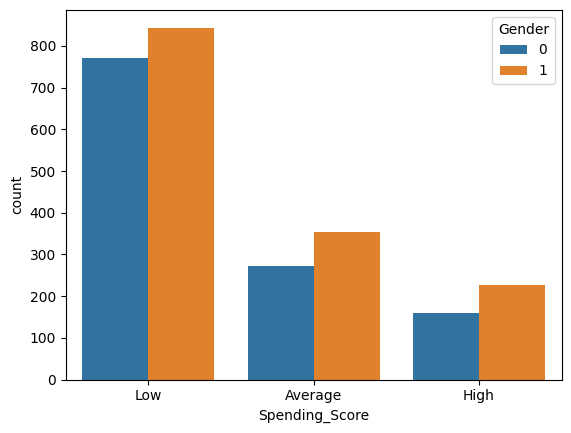

In [158]:
sns.countplot(x='Spending_Score', hue='Gender', data=df)

In [159]:
df.Profession.unique()

array(['Engineer', 'Healthcare', nan, 'Executive', 'Marketing', 'Doctor',
       'Artist', 'Lawyer', 'Entertainment', 'Homemaker'], dtype=object)

#### LabelEncoder Approach

In [160]:
label_encoder = LabelEncoder()

# Encode the 'Profession' column
df['Profession'] = label_encoder.fit_transform(df['Profession'])

# Encode the 'Spending_Score' column
df['Spending_Score'] = label_encoder.fit_transform(df['Spending_Score'])
# Encode the 'Var_1' column
df['Var_1'] = label_encoder.fit_transform(df['Var_1'])

<Axes: >

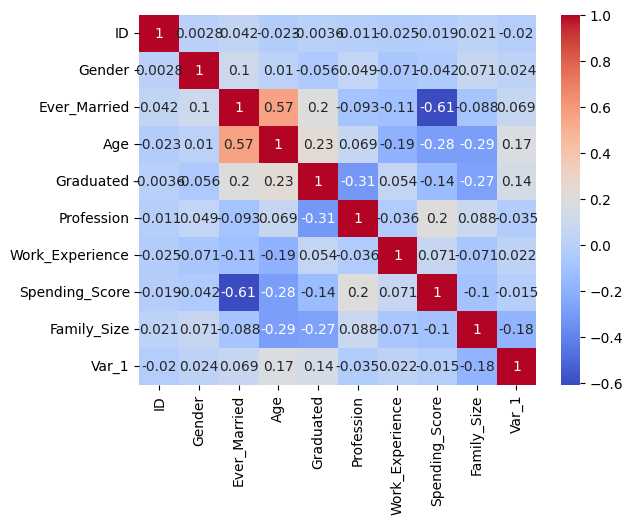

In [161]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [165]:
df.Work_Experience.unique()

array([ 0.        ,  8.        , 11.        ,  2.55258694,  5.        ,
        1.        ,  2.        ,  9.        ,  3.        ,  6.        ,
        7.        ,  4.        , 13.        , 10.        , 12.        ,
       14.        ])

C:\Users\shahz\AppData\Local\Temp\ipykernel_26152\2196315301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Work_Experience.fillna(df.Work_Experience.mean(),inplace=True)


In [229]:

features = ['Age', 'Work_Experience', 'Family_Size']
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

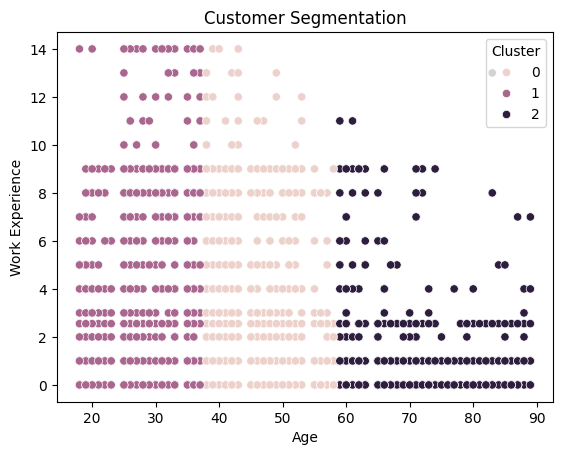

In [230]:
sns.scatterplot(data=df, x='Age', y='Work_Experience', hue='Cluster')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.title('Customer Segmentation')
plt.show()